# Ground-State: J1-J2 model

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update({'font.size': 18})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
import matplotlib.cm as cm

In [3]:
def stop(serie,calc_e,tol):
    total = len(serie)
    for i, energia in enumerate(serie):
        erro_absoluto = abs(energia - calc_e)
        if erro_absoluto < tol:
            break
    return energia,erro_absoluto,i,(i/len(serie)*100), total

In [4]:
def phase(a):
    if (a<29):
        return "AntiFerromagnetic Phase"
    elif (a>=29) and (a<166):
        return "Frustrated Phase"
    elif (a>=166) and (a<270):
        return "Ferromagnetic Phase"
    else:
        return "AntiFerromagnetic Phase"

In [5]:
def energy(line,df):
    line = line.replace("../../../../data/logs/t_","")
    line = line.replace(".log","")
    l    = line.split("_")
    n = l[0]; degree = l[1]; n_it = l[2]
    df_loc = df
    df_loc = df_loc[df_loc['l']      == int(n)]
    df_loc = df_loc[df_loc['degree'] == int(degree)]
    df_loc = df_loc[df_loc['n_it']   == int(n_it)]
    return list(df_loc['calc_energy'])[0], list(df_loc['exact_energy'])[0]   

In [24]:
def calc_energy_series(path):
    
    with open(path) as f:
        data = json.load(f)

    iters_list = data['Energy']['iters']
    energy_list = data['Energy']['Mean']['real']
    
    return iters_list,energy_list

In [25]:
def exact_energy(path,energy_list,tol):

    line = path.replace("../../../../data/logs/t_", "").replace(".log", "")
    ll = line.split("_") ; n, degree, n_it = ll[0], ll[1], ll[2]; l  = n
    df_loc = df[
        (df['l'] == int(n)) &
        (df['degree'] == int(degree)) &
        (df['n_it'] == int(n_it))
    ]

    calc_e = df_loc['calc_energy'].iloc[0]
    exac_e = df_loc['exact_energy'].iloc[0]
    
    e, error, stop_i, p, total = stop(energy_list,calc_e,tol);p_str = f"{p:.2f}"  

    return calc_e,exac_e,e, error, stop_i, p, total,l

In [26]:
dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

In [74]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [75]:
i = 300; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 330; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 0; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 15; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)


calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

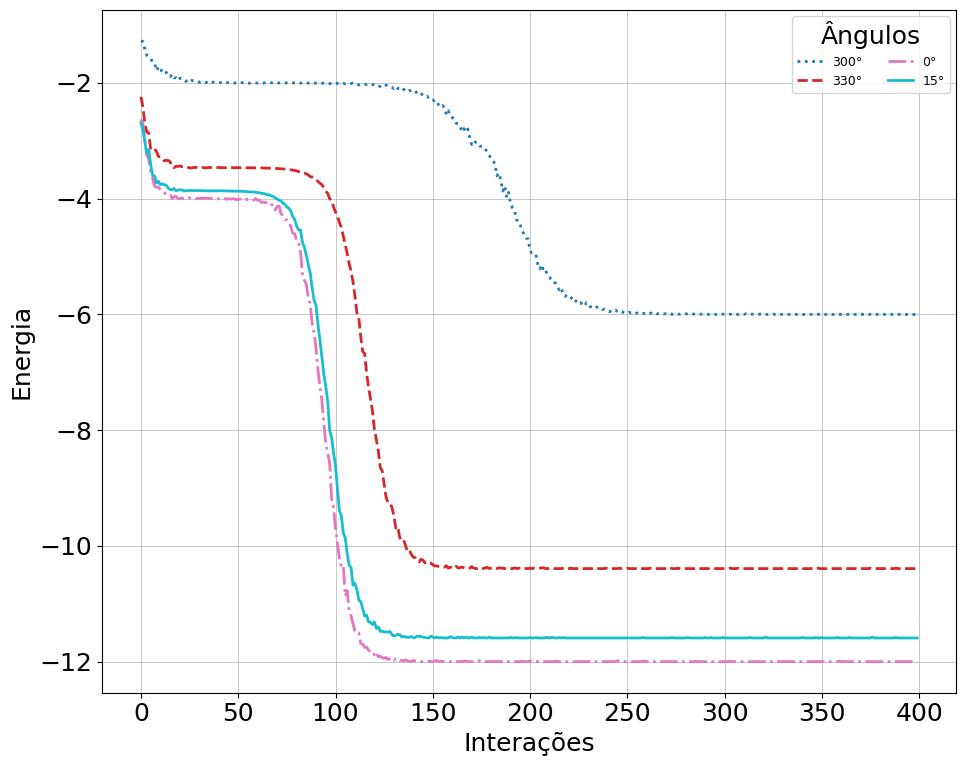

In [77]:
n_curvas = 4

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [79]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [80]:
i = 30; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 45; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 60; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 120; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)


calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

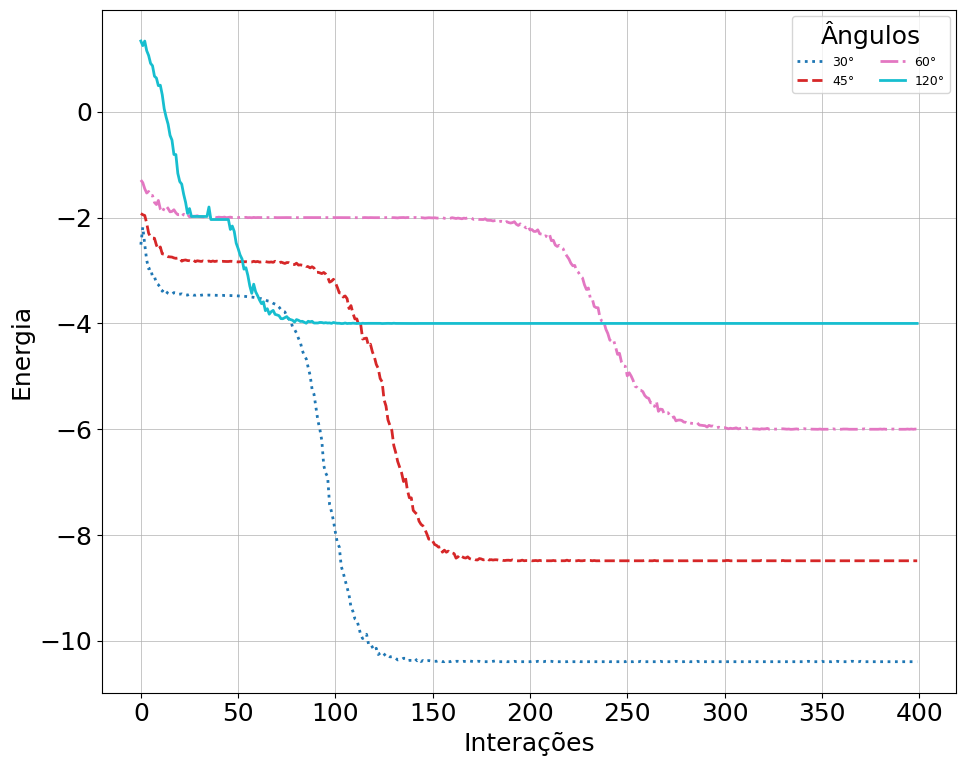

In [81]:
n_curvas = 4

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [82]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [83]:
i = 180; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 210; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 240; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

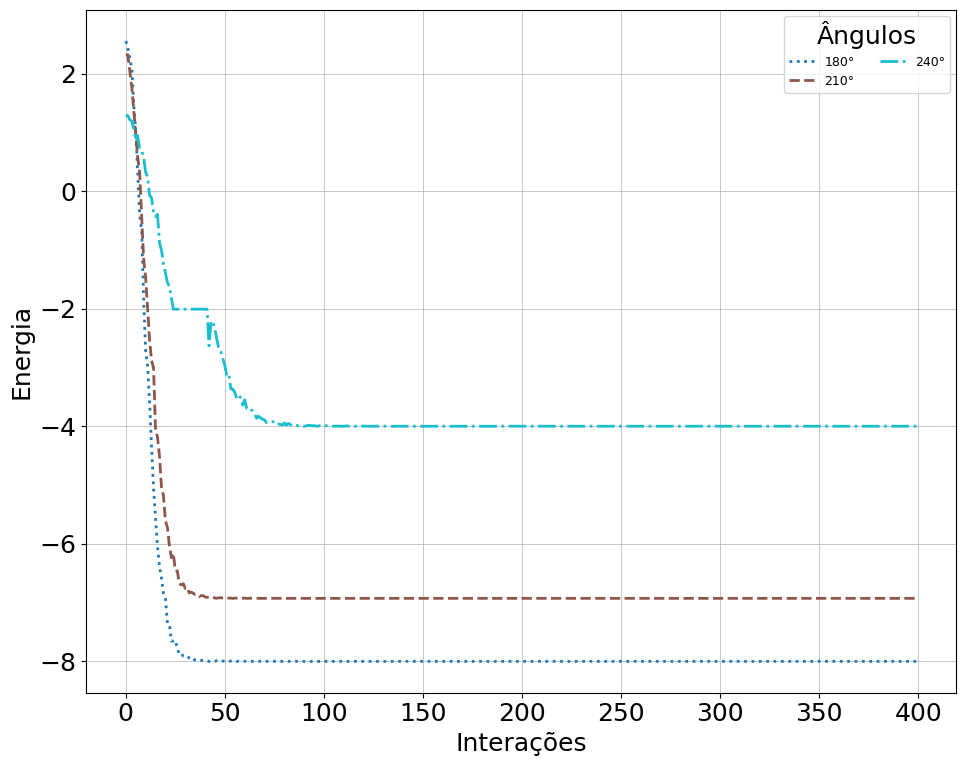

In [85]:
n_curvas = 3

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [78]:
# Número de curvas
n_curvas = 10

# Geração de cores automaticamente com colormap
colors = cm.tab10(np.linspace(0, 1, n_curvas))  # Use outro colormap se quiser mais contraste

# Estilos de linha para até 10 curvas
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]


for i in range(6):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             label=f"{theta_list[i]}\u00b0", linestyle=linestyles[i])
    
    # Linhas horizontais e verticais sem rótulo
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle='--', linewidth=1, label=None)
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle=':', linewidth=1, label=None)


# Apenas as curvas na legenda
ax1.legend(title='Ângulos', loc='upper right')

plt.tight_layout()
plt.show()


IndexError: list index out of range

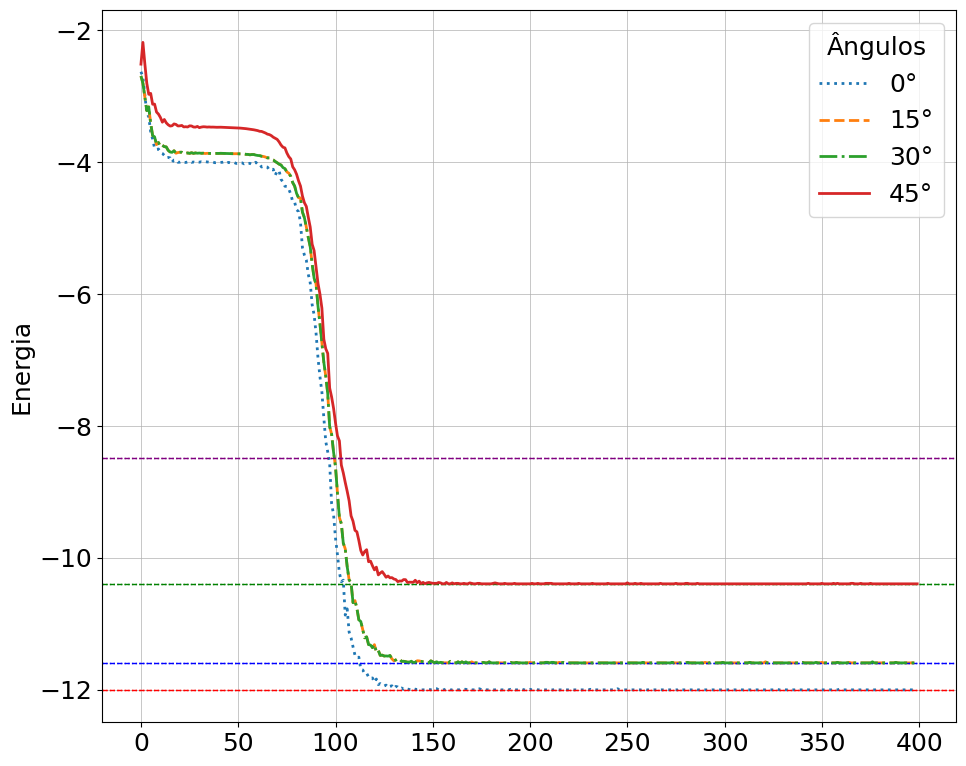

In [53]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.grid(lw=0.5)

colors = ['red', 'blue', 'green', 'purple']
linestyles = [':', '--', '-.', '-']

for i in range(4):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             label=f"{theta_list[i]}\u00b0", linestyle=linestyles[i])
    
    # Linhas horizontais e verticais sem rótulo
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle='--', linewidth=1, label=None)
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle=':', linewidth=1, label=None)


# Apenas as curvas na legenda
ax1.legend(title='Ângulos', loc='upper right')

plt.tight_layout()
plt.show()


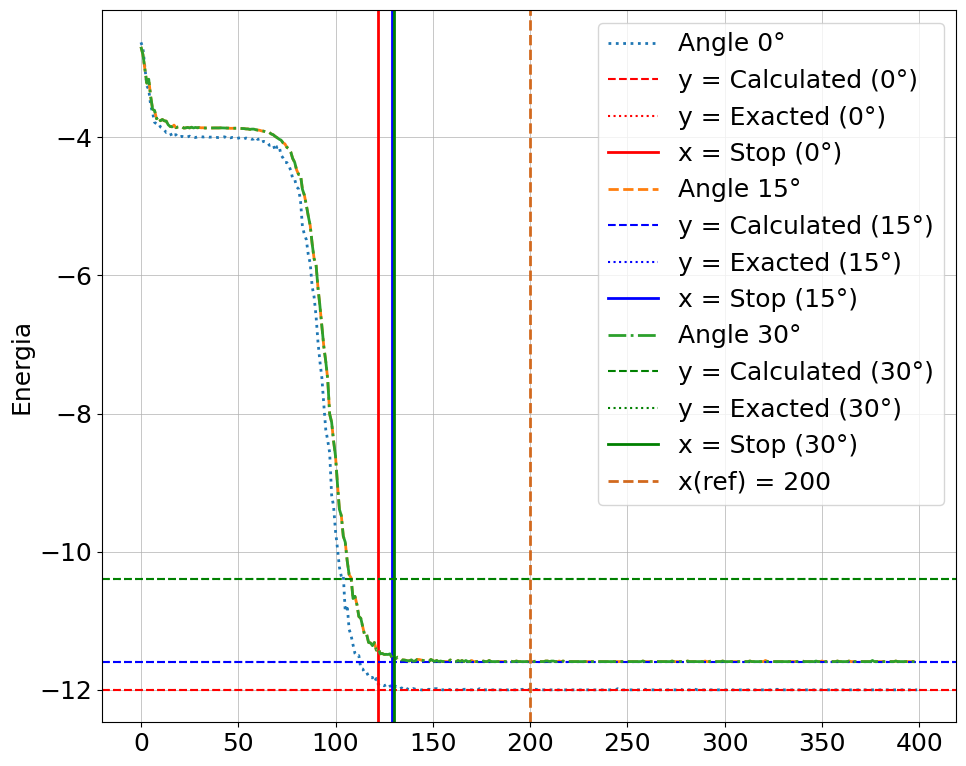

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Txt_L = "L = " + str(l)

# Criação do gráfico
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.grid(lw=0.5)

# Cores para as linhas de cada curva
colors = ['red', 'blue', 'green']
linestyles = [':', '--', '-.']

# Adiciona as 3 curvas e respectivas linhas auxiliares
handles = []
labels = []

for i in range(3):
    # Curva de energia
    ax1.plot(iters_list, energy_matrix[i], lw=2, label=f"Angle {theta_list[i]}\u00b0", linestyle=linestyles[i])
    
    # Linhas horizontais
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle='--', label=f'y = Calculated ({theta_list[i]}\u00b0)')
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle=':', label=f'y = Exacted ({theta_list[i]}\u00b0)')
    
    # Linha vertical de parada
    ax1.axvline(x=stop_i_list[i], color=colors[i], linestyle='-', linewidth=2, label=f'x = Stop ({theta_list[i]}\u00b0)')
    

# Linha de referência comum
ax1.axvline(x=200, color='chocolate', linestyle='--', linewidth=2, label='x(ref) = 200')

# Legenda final
auto_handles, auto_labels = ax1.get_legend_handles_labels()
handles = auto_handles + handles
labels = auto_labels + labels
ax1.legend(handles=handles, labels=labels, loc='upper right')

plt.tight_layout()
plt.show()


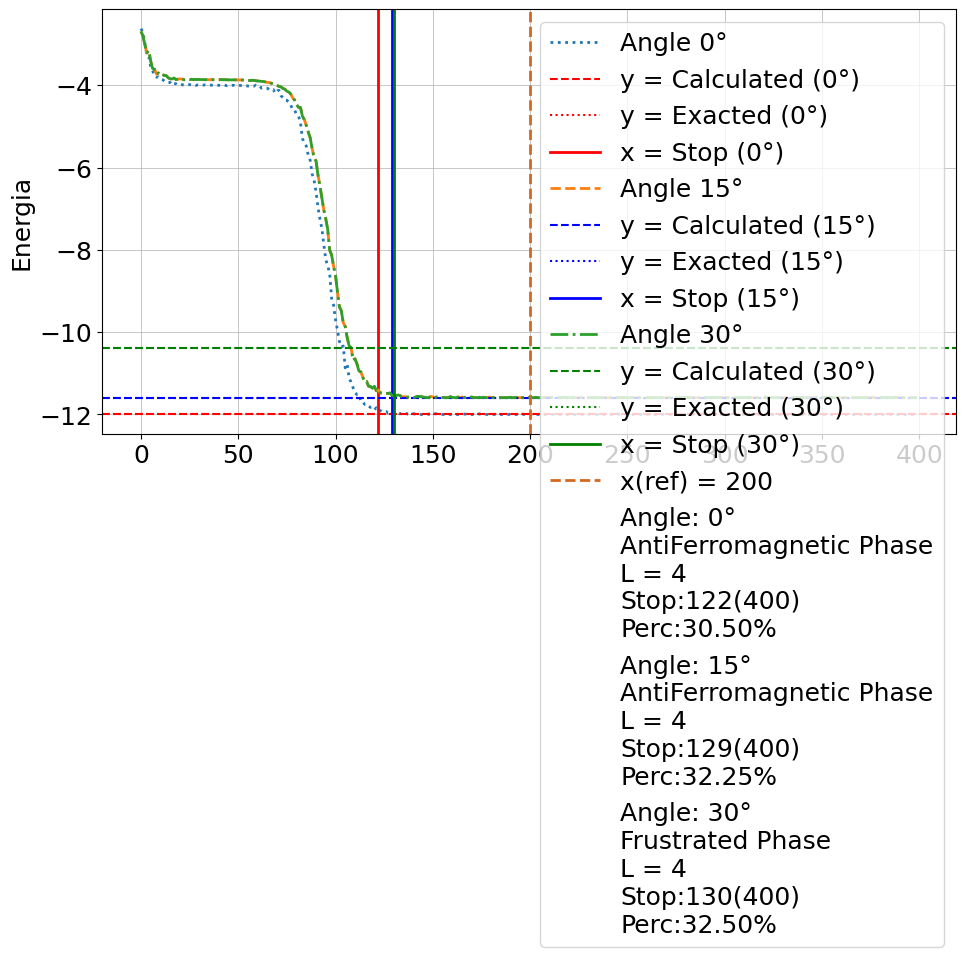

In [45]:
Txt_L = "L = " + str(l)

# Criação do gráfico
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.grid(lw=0.5)

# Cores para as linhas de cada curva
colors = ['red', 'blue', 'green']
linestyles = [':', '--', '-.']

# Adiciona as 3 curvas e respectivas linhas auxiliares
handles = []
labels = []

for i in range(3):
    # Texto explicativo
    Txt_Phase = phase(theta_list[i])
    Txt_Stop  = "Stop:" + str(stop_i_list[i]) + "(" + str(total_list[i]) + ")" + "\nPerc:" + p_list[i] + "%"
    obs_text  = f"Angle: {theta_list[i]}\u00b0\n{Txt_Phase}\n{Txt_L}\n{Txt_Stop}"
    fake_patch = mpatches.Patch(color='none', label=obs_text)
    
    # Curva de energia
    ax1.plot(iters_list, energy_matrix[i], lw=2, label=f"Angle {theta_list[i]}\u00b0", linestyle=linestyles[i])
    
    # Linhas horizontais
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle='--', label=f'y = Calculated ({theta_list[i]}\u00b0)')
    ax1.axhline(y=calc_list[i], color=colors[i], linestyle=':', label=f'y = Exacted ({theta_list[i]}\u00b0)')
    
    # Linha vertical de parada
    ax1.axvline(x=stop_i_list[i], color=colors[i], linestyle='-', linewidth=2, label=f'x = Stop ({theta_list[i]}\u00b0)')
    
    # Adiciona texto à legenda
    handles.append(fake_patch)
    labels.append(obs_text)

# Linha de referência comum
ax1.axvline(x=200, color='chocolate', linestyle='--', linewidth=2, label='x(ref) = 200')

# Legenda final
auto_handles, auto_labels = ax1.get_legend_handles_labels()
handles = auto_handles + handles
labels = auto_labels + labels
ax1.legend(handles=handles, labels=labels, loc='upper right')

plt.tight_layout()
plt.show()


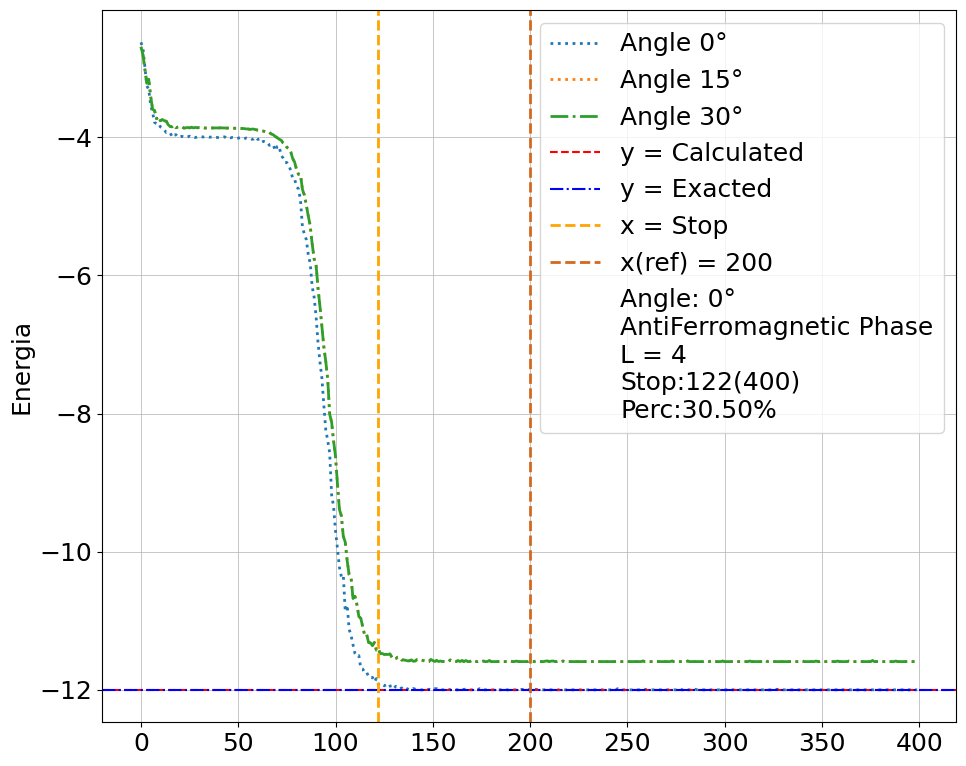

In [44]:
Txt_L     ="L = " + str(l)
Txt_Phase = phase(theta_list[0])
Txt_Stop  ="Stop:" + str(stop_i_list[0]) + "(" + str(total_list[0]) + ")" + "\nPerc:" + p_list[0] + "%"
    
fig, ax1 = plt.subplots(figsize=(10, 8))
    
obs_text = f"Angle: {theta_list[0]}\u00b0\n{Txt_Phase}\n{Txt_L}\n{Txt_Stop}"
fake_patch = mpatches.Patch(color='none', label=obs_text)


ax1.set_ylabel('Energia')
ax1.grid(lw=0.5)

ax1.plot(iters_list, energy_matrix[0], lw=2, label=f"Angle {theta_list[0]}\u00b0", linestyle=':')

ax1.plot(iters_list, energy_matrix[1], lw=2, label=f"Angle {theta_list[1]}\u00b0", linestyle=':')

ax1.plot(iters_list, energy_matrix[2], lw=2, label=f"Angle {theta_list[2]}\u00b0", linestyle='-.')



linha1 = ax1.axhline(y=calc_list[0], color='red', linestyle='--',  label='y = Calculated')
linha2 = ax1.axhline(y=calc_list[0], color='blue', linestyle='-.', label='y = Exacted')
    
linha3 = ax1.axvline(x=stop_i_list[0], color='orange',    linestyle='--', linewidth=2, label='x = Stop')
linha4 = ax1.axvline(x=200,            color='chocolate', linestyle='--', linewidth=2, label='x(ref) = 200')
   

handles, labels = ax1.get_legend_handles_labels()
handles.append(fake_patch)
labels.append(obs_text)
ax1.legend(handles=handles, labels=labels, loc='upper right')
  
plt.tight_layout()

plt.show()

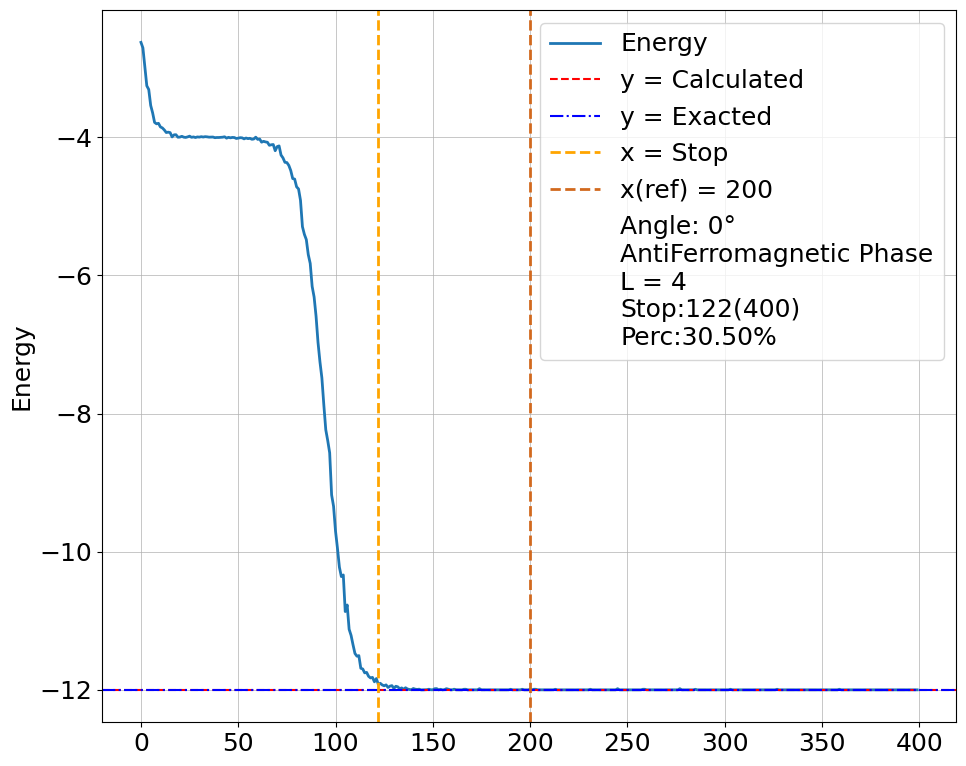

In [30]:
Txt_L     ="L = " + str(l)
Txt_Phase = phase(i)
Txt_Stop  ="Stop:" + str(stop_i) + "(" + str(total) + ")" + "\nPerc:" + p_str + "%"
    
fig, ax1 = plt.subplots(figsize=(10, 8))
    
obs_text = f"Angle: {i}\u00b0\n{Txt_Phase}\n{Txt_L}\n{Txt_Stop}"
fake_patch = mpatches.Patch(color='none', label=obs_text)

ax1.plot(iters_list, energy_list, lw=2, label='Energy')
ax1.set_ylabel('Energy')
ax1.grid(lw=0.5)
    
linha1 = ax1.axhline(y=calc_e, color='red', linestyle='--', label='y = Calculated')
linha2 = ax1.axhline(y=exac_e, color='blue', linestyle='-.', label='y = Exacted')
    
linha3 = ax1.axvline(x=stop_i, color='orange',     linestyle='--', linewidth=2, label='x = Stop')
linha4 = ax1.axvline(x=200,    color='chocolate', linestyle='--', linewidth=2, label='x(ref) = 200')
   

handles, labels = ax1.get_legend_handles_labels()
handles.append(fake_patch)
labels.append(obs_text)
ax1.legend(handles=handles, labels=labels, loc='upper right')
  
plt.tight_layout()

img_path = path.replace(".log", ".png").replace("logs", "imgs")
plt.show()

In [ ]:

i = 15; path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log";tol  = 0.085

In [9]:
e0 = calc_energy_series(path); e15 = calc_energy_series(path);

In [ ]:
def view(path,i,df,tol,save_img):

    with open(path) as f:
        data = json.load(f)
    
    iters = data['Energy']['iters']
    energy = data['Energy']['Mean']['real']
    
    line = path.replace("../../../../data/logs/t_", "").replace(".log", "")
    ll = line.split("_")
    n, degree, n_it = ll[0], ll[1], ll[2]
    l  = n

    
    df_loc = df[
        (df['l'] == int(n)) &
        (df['degree'] == int(degree)) &
        (df['n_it'] == int(n_it))
    ]

    calc_e = df_loc['calc_energy'].iloc[0]
    exac_e = df_loc['exact_energy'].iloc[0]
    
    
    e, error, stop_i, p, total = stop(energy,calc_e,tol);p_str = f"{p:.2f}"  

    Txt_L     ="L = " + str(l)
    Txt_Phase = phase(i)
    Txt_Stop  ="Stop:" + str(stop_i) + "(" + str(total) + ")" + "\nPerc:" + p_str + "%"
    
    
    fig, ax1 = plt.subplots(figsize=(10, 8))
    
    obs_text = f"Angle: {i}\u00b0\n{Txt_Phase}\n{Txt_L}\n{Txt_Stop}"
    fake_patch = mpatches.Patch(color='none', label=obs_text)

    ax1.plot(iters, energy, lw=2, label='Energy')
    ax1.set_ylabel('Energy')
    ax1.grid(lw=0.5)
    
    linha1 = ax1.axhline(y=calc_e, color='red', linestyle='--', label='y = Calculated')
    linha2 = ax1.axhline(y=exac_e, color='blue', linestyle='-.', label='y = Exacted')
    
    linha3 = ax1.axvline(x=stop_i, color='orange',     linestyle='--', linewidth=2, label='x = Stop')
    linha4 = ax1.axvline(x=200,    color='chocolate', linestyle='--', linewidth=2, label='x(ref) = 200')
   

    handles, labels = ax1.get_legend_handles_labels()
    handles.append(fake_patch)
    labels.append(obs_text)
    ax1.legend(handles=handles, labels=labels, loc='upper right')
  

    plt.tight_layout()

    img_path = path.replace(".log", ".png").replace("logs", "imgs")
    
    if save_img:   
        plt.savefig(img_path, dpi=300)


    plt.show()

In [ ]:
#t_4_0_400_1200
dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

for i in range(0,360,1):

    
    try:
        path = "../../../../data/logs/t_4_" + str(i) + "_400_1200.log"
        tol  = 0.085
        
        print(path)
        view(path,i,df,tol,True)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}") 

In [ ]:
dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

for i in range(0,360,1):
    
    try:
        path = "../../../../data/logs/t_6_" + str(i) + "_600_1200.log"
        tol  = 0.085
        
        print(path)
        view(path,i,df,tol,True)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}") 

In [ ]:
#t_20_35_300_1008
dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

for i in range(0,360,1):
    
    try:
        path = "../../../../data/logs/t_20_" + str(i) + "_300_1008.log"
        tol  = 0.085
        
        print(path)
        view(path,i,df,tol,True)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}") 

In [ ]:
#t_14_90_600_1200.csv

dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

for i in range(0,360,1):
    
    try:
        path = "../../../../data/logs/t_14_" + str(i) + "_1200_2016.log"
        tol  = 0.085
        
        print(path)
        view(path,i,df,tol,True)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}") 

In [ ]:
#t_12_118_1200_2016.log

dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

for i in range(0,360,1):
    
    try:
        path = "../../../../data/logs/t_12_" + str(i) + "_1200_2016.log"
        tol  = 0.085
        
        print(path)
        view(path,i,df,tol,True)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}") 
        break;

In [ ]:
for i in range(0,360,15):
    
    try:
        
        path = "../../../../data/logs/t_8_" + str(i) + "_1200_2016.log"
        tol  = 0.085
        view(path,i,df,tol)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}")        


In [ ]:
for i in range(0,360,5):
    
    try:
        path = "../../../../data/logs/t_12_" + str(i) + "_50_1008.log"
        tol  = 0.085
        view(path,i,df,tol)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}")        


In [ ]:
for i in range(0,360,5):
    
    try:
        path = "../../../../data/logs/t_20_" + str(i) + "_50_1008.log"
        tol  = 0.085
        view(path,i,df,tol)
    
    except Exception as e:
        print(f"Tipo de erro: {type(e).__name__}")
        print(f"Mensagem de erro: {e}") 